# Linear Algebra Lab no 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# # <font face="gotham" color="purple"> Visualisation of System of Equations </font>

Consider a linear system of two equations:
\begin{align}
x+y&=6\\
x-y&=-4
\end{align}
Easy to solve: $(x, y)^T = (1, 5)^T$. Let's plot the linear system.

# #<font face="gotham" color="purple"> How to Draw a Plane </font>


Before drawing a plane, let's refresh the logic of Matplotlib 3D plotting. This should be familiar to you if you are a MATLAB user. 

First, create meshgrids.

In [2]:
x, y = [-1, 0, 1], [-1, 0, 1]
X, Y = np.meshgrid(x, y)

Mathematically, meshgrids are the coordinates of <font face="gotham" color="red">Cartesian product</font>. To illustrate, we can plot all the coordinates of these meshgrids

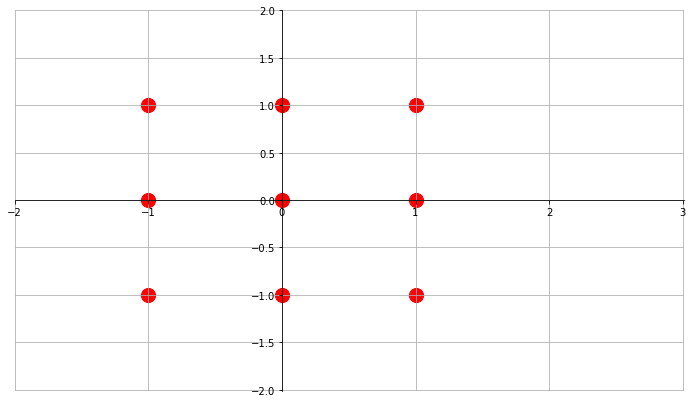

In [3]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(X, Y, s = 200, color = 'red')
ax.axis([-2, 3.01, -2.01, 2])
ax.spines['left'].set_position('zero') # alternative position is 'center'
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid()
plt.show()


Try a more complicated meshgrid.

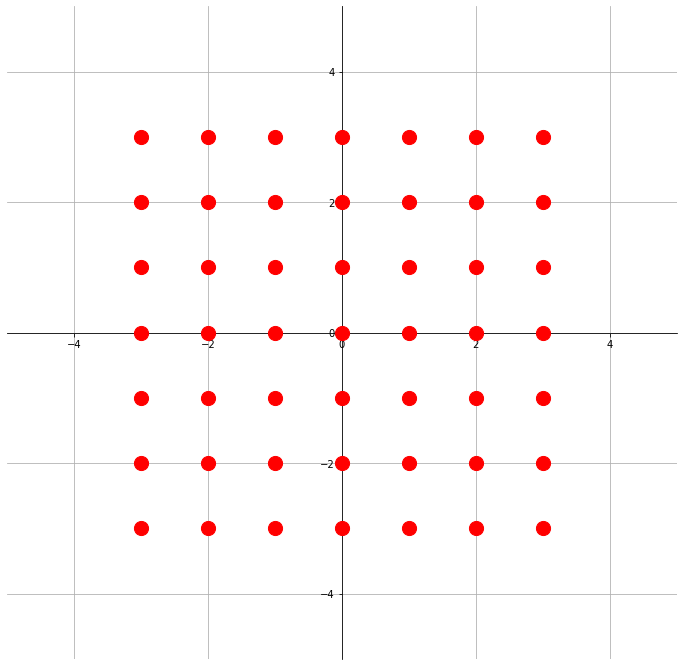

In [4]:
x, y = np.arange(-3, 4, 1), np.arange(-3, 4, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize = (12, 12))
ax.scatter(X, Y, s = 200, color = 'red', zorder = 3)
ax.axis([-5, 5, -5, 5])

ax.spines['left'].set_position('zero') # alternative position is 'center'
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid()

Now consider the function $z = f(x, y)$, $z$ is in the $3rd$ dimension. Though Matplotlib is not meant for delicate plotting of 3D graphics, basic 3D plotting is still acceptable. 

For example, we define a simple plane as 
$$z= x + y$$
Then plot $z$

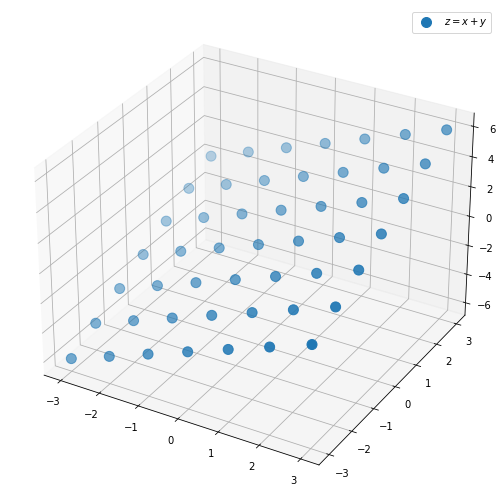

In [5]:
Z = X + Y
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X, Y, Z, s = 100, label = '$z=x+y$')
ax.legend()
plt.show()

Or we can plot it as a surface, Matplotlib will automatically interpolate values among the Cartesian coordinates such that the graph will look like a surface.

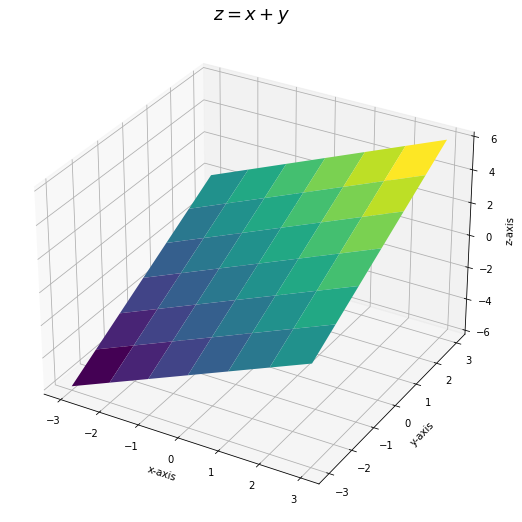

In [6]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap ='viridis') # MATLAB default color map
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('$z=x+y$', size = 18)
plt.show()

# <font face="gotham" color="purple"> Visualisation of A System of Three Linear Equations  </font>

We have reviewed on plotting planes, now we are ready to plot several planes all together.

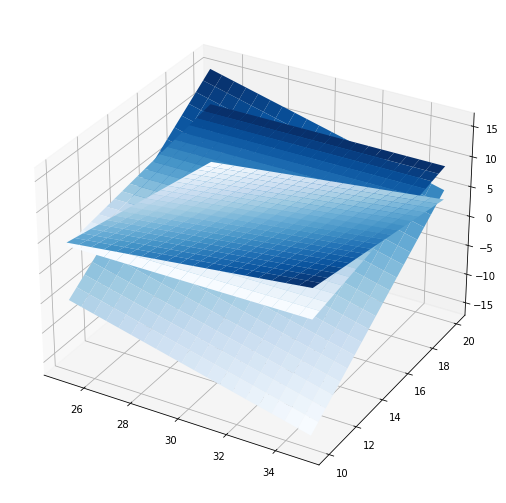

In [7]:
x1 = np.linspace(25, 35, 20)
x2 = np.linspace(10, 20, 20)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

X3 = 2*X2 - X1
ax.plot_surface(X1, X2, X3, cmap ='Blues', alpha = 1) 

X3 = .5*X2 - 1
ax.plot_surface(X1, X2, X3, cmap ='Blues', alpha = 1)

X3 = -5/9*X2 + 4/9*X1 - 1
ax.plot_surface(X1, X2, X3, cmap ='Blues', alpha = 1)

ax.scatter(29, 16, 3, s = 200, color = 'black')
plt.show()

We are certain there is a solution, however the graph does not show the intersection of planes. The problem originates from Matplotlib's rendering algorithm, which is not designed for drawing genuine 3D graphics. It merely projects 3D objects onto 2D dimension to imitate 3D features.

To understand the visualization of planes' intersections kindly use www.geogebra.org/classic/3d

# <font face="gotham" color="purple"> Reduced Row Echelon Form </font>


We define a SymPy matrix:

In [8]:
M = sy.Matrix([[5, 0, 11, 3], [7, 23, -3, 7], [12, 11, 3, -4]]); M

⎡5   0   11  3 ⎤
⎢              ⎥
⎢7   23  -3  7 ⎥
⎢              ⎥
⎣12  11  3   -4⎦

Think of it as an **augmented matrix** which combines coefficients of linear system. With row operations, we can solve the system quickly. Let's turn it into a **row reduced echelon form**.

In [9]:
M_rref = M.rref(); M_rref # .rref() is the SymPy method for row reduced echelon form

⎛⎡         -2165 ⎤           ⎞
⎜⎢1  0  0  ──────⎥           ⎟
⎜⎢          1679 ⎥           ⎟
⎜⎢               ⎥           ⎟
⎜⎢          1358 ⎥           ⎟
⎜⎢0  1  0   ──── ⎥, (0, 1, 2)⎟
⎜⎢          1679 ⎥           ⎟
⎜⎢               ⎥           ⎟
⎜⎢          1442 ⎥           ⎟
⎜⎢0  0  1   ──── ⎥           ⎟
⎝⎣          1679 ⎦           ⎠

Take out the first element in the big parentheses, i.e. the rref matrix.


In [10]:
M_rref = np.array(M_rref[0]);M_rref

array([[1, 0, 0, -2165/1679],
       [0, 1, 0, 1358/1679],
       [0, 0, 1, 1442/1679]], dtype=object)

If you don't like fractions, convert it into float type.

In [11]:
M_rref.astype(float)

array([[ 1.   ,  0.   ,  0.   , -1.289],
       [ 0.   ,  1.   ,  0.   ,  0.809],
       [ 0.   ,  0.   ,  1.   ,  0.859]])

The last column of the rref matrix is the solution of the system.

In [12]:
## <font face="gotham" color="purple"> Example: rref and Visualisation </font>



Let's use ```.rref()``` method to compute a solution of a system then visualise it. Consider the system:

\begin{align}
3x+6y+2z&=-13\\
x+2y+z&=-5\\
-5x-10y-2z&=19
\end{align}



In [13]:
A = sy.Matrix([[3, 6, 2, -13], [1, 2, 1, -5], [-5, -10, -2, 19]]);A

A_rref = A.rref(); A_rref


⎛⎡1  2  0  -3⎤        ⎞
⎜⎢           ⎥        ⎟
⎜⎢0  0  1  -2⎥, (0, 2)⎟
⎜⎢           ⎥        ⎟
⎝⎣0  0  0  0 ⎦        ⎠

In case you are wondering what's $(0, 2)$: they are the column number of pivot columns, in the augmented matrix above the pivot columns resides on the $0$th and $2$nd column.

Because it's not a rank matrix, therefore solutions is in general form
\begin{align}
x + 2y & = -3\\
z &= -2\\
y &= free
\end{align}
Let's pick 3 different values of $y$, for instance $(3, 5, 7)$, to calculate $3$ special solutions:


In [14]:
point1 = (-2*3-3, 3, -2)
point2 = (-2*5-3, 5, -2)
point3 = (-2*7-3, 7, -2)
special_solution = np.array([point1, point2, point3]); special_solution # each row is a special solution


array([[ -9,   3,  -2],
       [-13,   5,  -2],
       [-17,   7,  -2]])

We can visualise the general solution, and the 3 specific solutions altogether.


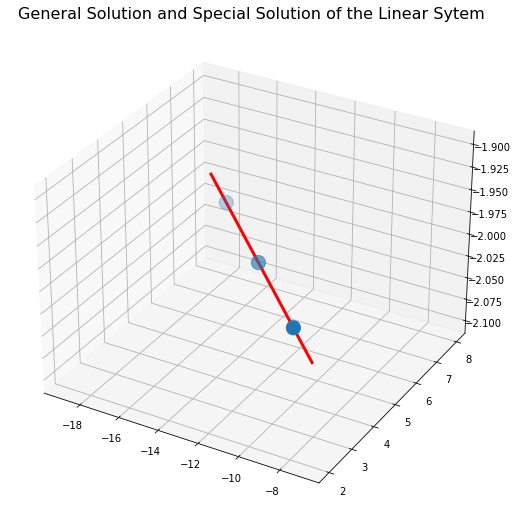

In [15]:
y = np.linspace(2, 8, 20) # y is the free variable
x = -3 - 2*y
z = np.full((len(y), ), -2) # z is a constant

fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw = 3, color = 'red')
ax.scatter(special_solution[:,0], special_solution[:,1], special_solution[:,2], s = 200)
ax.set_title('General Solution and Special Solution of the Linear Sytem', size= 16)
plt.show()



## <font face="gotham" color="purple"> Example: A Symbolic Solution </font>

Consider a system where all right-hand side values are indeterminate:

\begin{align}
x + 2y - 3z &= a\\
4x - y + 8z &= b\\
2x - 6y - 4z &= c
\end{align}

We define $a, b, c$ as SymPy objects, then extract the augmented matrix


In [16]:
a, b, c = sy.symbols('a, b, c', real = True)
A = sy.Matrix([[1, 2, -3, a], [4, -1, 8, b], [2, -6, -4, c]]); A


⎡1  2   -3  a⎤
⎢            ⎥
⎢4  -1  8   b⎥
⎢            ⎥
⎣2  -6  -4  c⎦

We can immediately achieve the symbolic solution by using ```.rref()``` method.

In [17]:
A_rref = A.rref(); A_rref

⎛⎡            2⋅a   b   c    ⎤           ⎞
⎜⎢1  0  0     ─── + ─ + ──   ⎥           ⎟
⎜⎢             7    7   14   ⎥           ⎟
⎜⎢                           ⎥           ⎟
⎜⎢          16⋅a   b    10⋅c ⎥           ⎟
⎜⎢0  1  0   ──── + ── - ──── ⎥, (0, 1, 2)⎟
⎜⎢           91    91    91  ⎥           ⎟
⎜⎢                           ⎥           ⎟
⎜⎢           11⋅a   5⋅b   9⋅c⎥           ⎟
⎜⎢0  0  1  - ──── + ─── - ───⎥           ⎟
⎝⎣            91     91   182⎦           ⎠

In [18]:
vDict = {a: 3, b: 6, c: 7}
A_rref = A_rref[0].subs(vDict);A_rref # define a dictionary for special values to substitute in

⎡          31 ⎤
⎢1  0  0   ── ⎥
⎢          14 ⎥
⎢             ⎥
⎢         -16 ⎥
⎢0  1  0  ────⎥
⎢          91 ⎥
⎢             ⎥
⎢         -69 ⎥
⎢0  0  1  ────⎥
⎣         182 ⎦